In [10]:
from sklearn.model_selection import (
    train_test_split,
)
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
np.random.seed(42)
n_samples = 1000
n_features = 10

X = np.random.randn(n_samples, n_features)
true_coefficients = np.random.randn(n_features)
noise = np.random.randn(n_samples) * 0.5

y = np.dot(X, true_coefficients) + noise

feature_names = [f"feature_{i}" for i in range(1, n_features + 1)]
df_X = pd.DataFrame(X, columns=feature_names)

X_train, X_test, y_train, y_test = train_test_split(
    df_X, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape[0])
print("y_test shape:", y_test.shape[0])

X_train shape: (800, 10)
X_test shape: (200, 10)
y_train shape: 800
y_test shape: 200


In [12]:
base_estimator = LinearRegression()
model = BaggingRegressor(estimator=base_estimator, n_estimators=50, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [13]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.4f}")
print(f"R^2: {r2:.4f}\n")

MSE: 0.2326
R^2: 0.9647



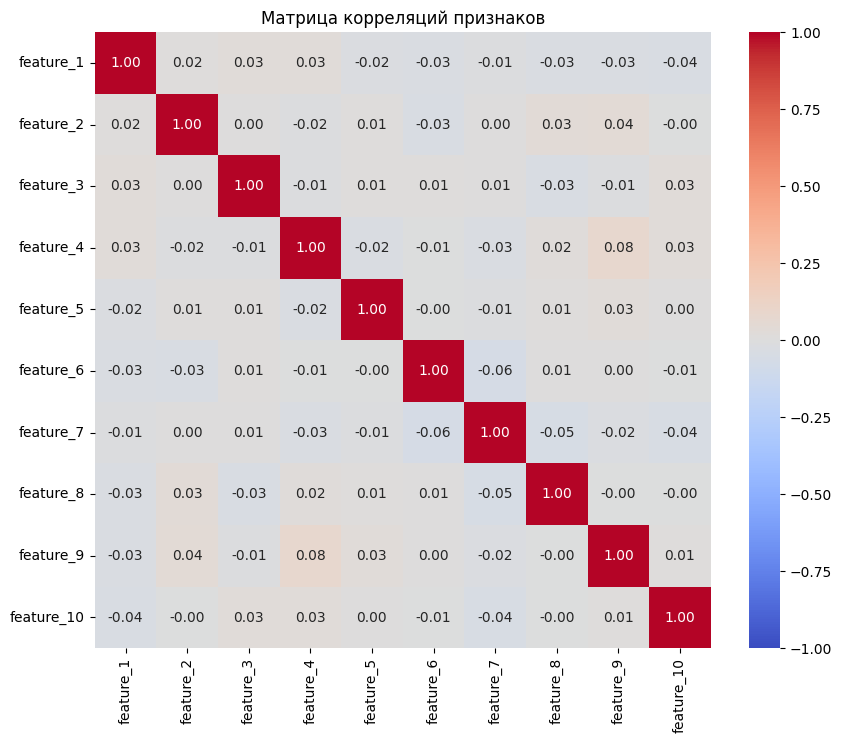

In [14]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_X.corr()

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    vmin=-1,
    vmax=1,
    center=0,
    square=True,
)
plt.title("Матрица корреляций признаков")
plt.show()

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

print(f"(VIF)")
vif_data = pd.DataFrame()
vif_data["Feature"] = df_X.columns
vif_data["VIF"] = [
    variance_inflation_factor(df_X.values, i) for i in range(len(df_X.columns))
]
print(vif_data.to_string(index=False), "\n")

(VIF)
   Feature      VIF
 feature_1 1.006393
 feature_2 1.005123
 feature_3 1.003296
 feature_4 1.010836
 feature_5 1.002321
 feature_6 1.006081
 feature_7 1.009424
 feature_8 1.005740
 feature_9 1.011893
feature_10 1.004816 



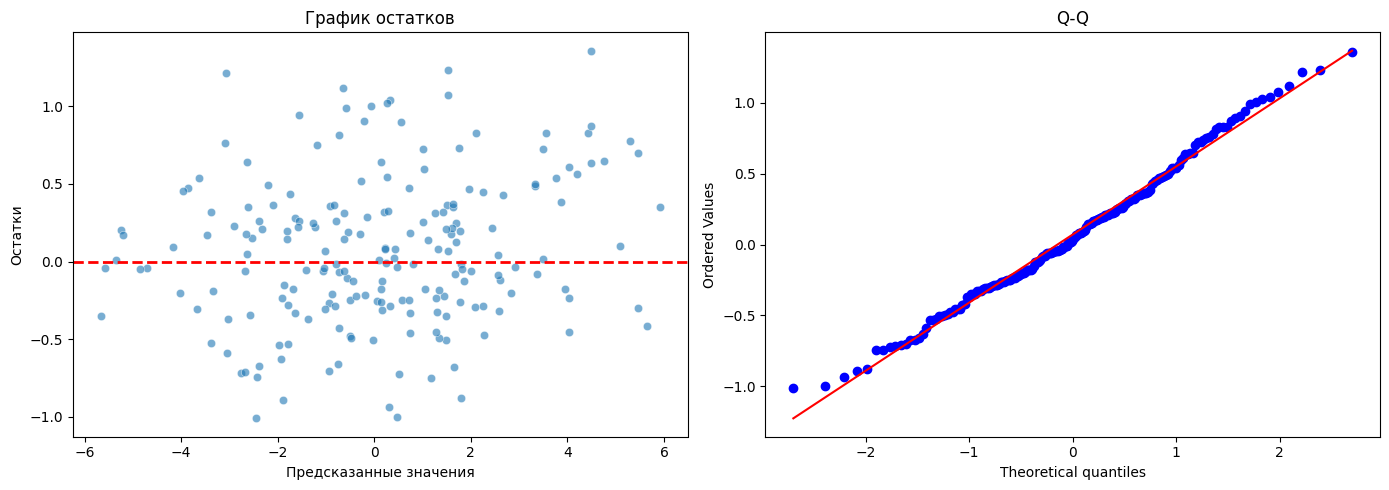

In [16]:
residuals = y_test - y_pred

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.scatterplot(x=y_pred, y=residuals, ax=ax[0], alpha=0.6)
ax[0].axhline(0, color="red", linestyle="--", linewidth=2)
ax[0].set_xlabel("Предсказанные значения")
ax[0].set_ylabel("Остатки")
ax[0].set_title("График остатков")

stats.probplot(residuals, dist="norm", plot=ax[1])
ax[1].set_title("Q-Q")

plt.tight_layout()
plt.show()

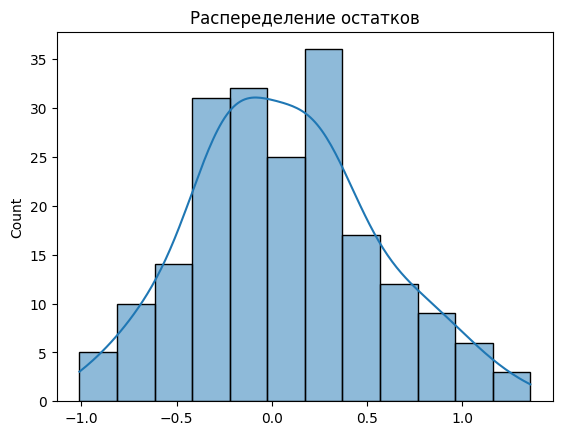

In [17]:
sns.histplot(residuals, kde=True)
plt.title("Распеределение остатков")
plt.show()

In [21]:
coefs = np.zeros(n_features)
for estimator in model.estimators_:
    coefs += estimator.coef_
avg_coefs = coefs / len(model.estimators_)

importance_df = pd.DataFrame(
    {"Feature": feature_names, "True_Coef": true_coefficients, "Bagged_Coef": avg_coefs}
)
print(f"Важность признаков")
print(importance_df.to_string(index=False))

Важность признаков
   Feature  True_Coef  Bagged_Coef
 feature_1  -0.678495    -0.692385
 feature_2  -0.305499    -0.306338
 feature_3  -0.597381    -0.583127
 feature_4   0.110418     0.140099
 feature_5   1.197179     1.185259
 feature_6  -0.771042    -0.770189
 feature_7   1.000820     0.986596
 feature_8  -0.781672    -0.754748
 feature_9  -0.847627    -0.851153
feature_10   0.818595     0.796777


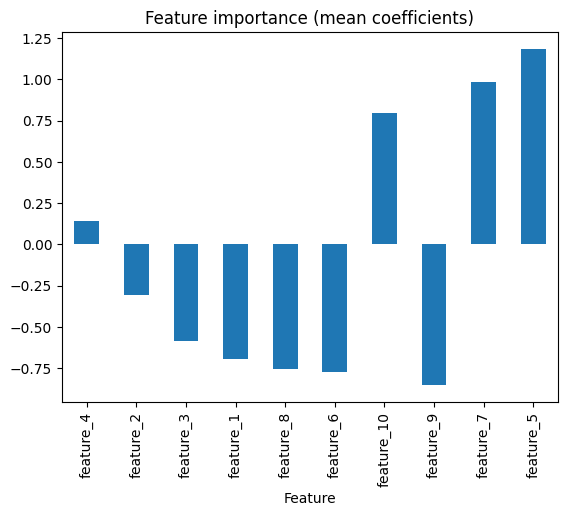

In [22]:
importance_df.sort_values(by="Bagged_Coef", key=abs).plot(
    x="Feature", y="Bagged_Coef", kind="bar", legend=False
)
plt.title("Feature importance (mean coefficients)")
plt.show()